In [13]:
import os
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CSV_0_PATH = Path("data", "wandb_export_classification_report_o9oevpao_tml_cel.csv")
CSV_1_PATH = Path("data", "wandb_export_classification_report_major-sweep-16_cel_loss.csv")

relevant_columns = ["micro avg", "run_name", "loss_function"]

In [14]:
df_0 = pd.read_csv(CSV_0_PATH)
df_1 = pd.read_csv(CSV_1_PATH)
df_0

,Unnamed: 0,metric,LOC,PER,ORG,MISC,micro avg,macro avg,weighted avg,run_name,run_corpus,run_type,k_shot_num,loss_function
0,0,precision,0.684900,0.816459,0.538058,0.475664,0.688278,0.628770,0.653374,crisp-sweep-40,CONLL03,contrastive,8,cel
1,1,recall,0.720624,0.852814,0.246839,0.306268,0.567635,0.531636,0.567635,crisp-sweep-40,CONLL03,contrastive,8,cel
2,2,f1-score,0.702308,0.834241,0.338423,0.372617,0.622162,0.561897,0.592088,crisp-sweep-40,CONLL03,contrastive,8,cel
3,3,support,1668.000000,1617.000000,1661.000000,702.000000,5648.000000,5648.000000,5648.000000,crisp-sweep-40,CONLL03,contrastive,8,cel
4,0,precision,0.590969,0.889785,0.454910,0.327273,0.594826,0.565734,0.603731,copper-sweep-39,CONLL03,contrastive,8,tml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3,support,1668.000000,1617.000000,1661.000000,702.000000,5648.000000,5648.000000,5648.000000,gentle-sweep-2,CONLL03,contrastive,8,cel
152,0,precision,0.725268,0.833848,0.438764,0.495881,0.640622,0.623440,0.643586,revived-sweep-1,CONLL03,contrastive,8,tml
153,1,recall,0.690048,0.834879,0.470199,0.428775,0.634384,0.605975,0.634384,revived-sweep-1,CONLL03,contrastive,8,tml
154,2,f1-score,0.707220,0.834363,0.453938,0.459893,0.637488,0.613853,0.638393,revived-sweep-1,CONLL03,contrastive,8,tml


In [27]:
df = pd.concat([df_0, df_1])
df = df.loc[(df["metric"] == "f1-score"), relevant_columns]
df.loc[df["loss_function"] == "tml", "loss_function"] = "Triplet Margin Loss"
df.loc[df["loss_function"] == "cel", "loss_function"] = "Cosine Embedding Loss"
df = df.reset_index(drop=True)
df

,micro avg,run_name,loss_function
0,0.622162,crisp-sweep-40,Cosine Embedding Loss
1,0.616199,copper-sweep-39,Triplet Margin Loss
2,0.489051,charmed-sweep-38,Cosine Embedding Loss
3,0.572418,elated-sweep-37,Triplet Margin Loss
4,0.410750,divine-sweep-36,Cosine Embedding Loss
5,0.522676,grateful-sweep-35,Triplet Margin Loss
6,0.582058,radiant-sweep-34,Cosine Embedding Loss
7,0.518649,lyric-sweep-33,Triplet Margin Loss
8,0.487994,deft-sweep-32,Cosine Embedding Loss
9,0.636715,azure-sweep-31,Triplet Margin Loss


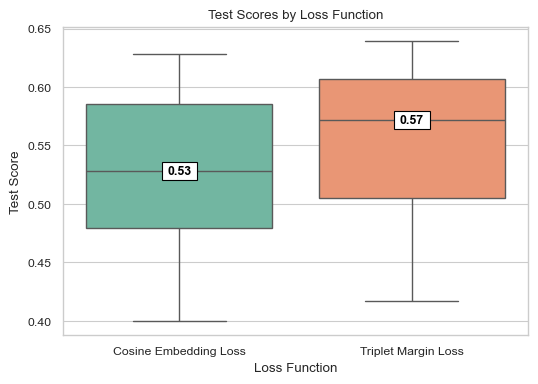

In [68]:
X_SIZE = 6
Y_SIZE = 4
plt.figure(figsize=(X_SIZE, Y_SIZE))

box_plot = sns.boxplot(x='loss_function', y='micro avg', data=df, hue='loss_function')

plt.title('Test Scores by Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('Test Score')

medians = df.groupby(['loss_function'])['micro avg'].median()

# Get the current axis
ax = plt.gca()

# Calculate the vertical offset based on the plot size
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
vertical_offset = y_range * 0.01  # 2% of the y-axis range

x_margin = X_SIZE = 0.025
y_margin = Y_SIZE = 0.0025

for xtick in box_plot.get_xticks():
    median = medians.iloc[xtick]
    text = ax.text(
        xtick, 
        median,
        f'{median:.2f}', 
        horizontalalignment='center',
        verticalalignment='center',
        size=9,
        color='black',
        weight='semibold'
    )
    
    # Get the bounding box of the text
    bbox = text.get_window_extent(renderer=plt.gcf().canvas.get_renderer())
    
    # Convert bbox to data coordinates
    bbox_data = bbox.transformed(ax.transData.inverted())
    
    rect = plt.Rectangle((bbox_data.x0 - x_margin, bbox_data.y0 - y_margin), 
                         bbox_data.width + 2*x_margin, 
                         bbox_data.height + 2*y_margin, 
                         facecolor='white', 
                         edgecolor='black', 
                         # alpha=0.7, 
                         zorder=3)
    
    ax.add_patch(rect)
    
    # Bring the text to the front
    text.set_zorder(4)


save_path = Path(os.getcwd(), "output_figs", "tml_cel_fig.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [35]:
stats = df.groupby('loss_function')['micro avg'].agg(['max', 'min', 'median', 'mean', 'std'])
stats['mean_std'] = stats['mean'].round(4).astype(str) + ' ± ' + stats['std'].round(4).astype(str)
stats = stats.loc[:, ["max", "min", 'median', 'mean_std']]
stats.columns = ['Highest', "Lowest", 'Median', 'Mean ± STD']
stats = stats.round(4)
stats

,Highest,Lowest,Median,Mean ± STD
loss_function,,,,
Cosine Embedding Loss,0.6279,0.3999,0.5280,0.5252 ± 0.0739
Triplet Margin Loss,0.6394,0.4169,0.5717,0.5535 ± 0.0663


In [36]:
print(stats.style.format(precision=4).to_latex())

\begin{tabular}{lrrrl}
 & Highest & Lowest & Median & Mean ± STD \\
loss_function &  &  &  &  \\
Cosine Embedding Loss & 0.6279 & 0.3999 & 0.5280 & 0.5252 ± 0.0739 \\
Triplet Margin Loss & 0.6394 & 0.4169 & 0.5717 & 0.5535 ± 0.0663 \\
\end{tabular}

